<a href="https://colab.research.google.com/github/garvitbhardwajj/email_campaign_effectivness/blob/main/Email_campaign_ML_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -- Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member -Garvit Bhardwaj**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


<ipython-input-2-f35e65fb5577>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515067 sha256=919ace8d73f34fd5476e1582c66bfca7f51bf813519507495ddca52bee27eb74
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Almabetter/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=df.shape[0]
columns=df.shape[1]
print(f'dataset has {rows} rows and {columns} columns')

dataset has 68353 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated(keep=False).sum()

0

#### Missing Values/Null Values

In [ ]:
df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


<Axes: >

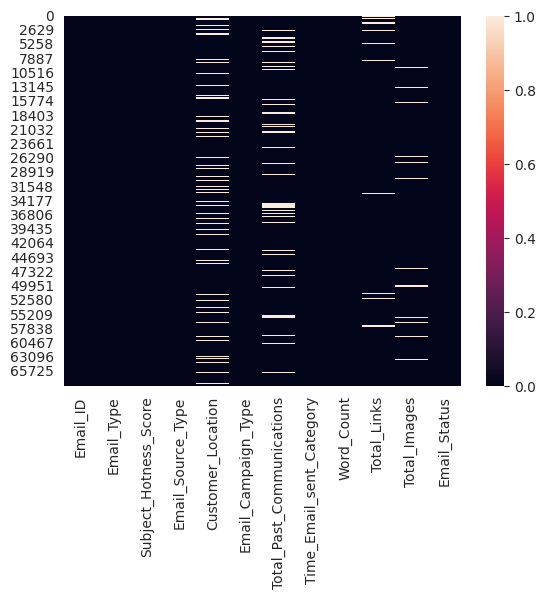

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What did you know about your dataset?

The dataset belongs to email campaign market. each row is a unique email_id with different characterstics of the email sent to that email id.
above dataset has 48,291 rowsa dn 12 columns.
our goal is to find for a new email with given characterstice, whether it will be read, acknowleged or ignored

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000
mean,1.285436,1.097095,1.458015,2.273343,28.899464,1.999607,700.489449,10.439357,3.545795,0.231865
std,0.451627,0.998007,0.498239,0.468336,12.533461,0.630800,271.981666,6.388488,5.590190,0.497598
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description

In [ ]:
df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68346,EMA00089992519500,1,1.2,2,E,2,30.0,3,565,14.0,3.0,1
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


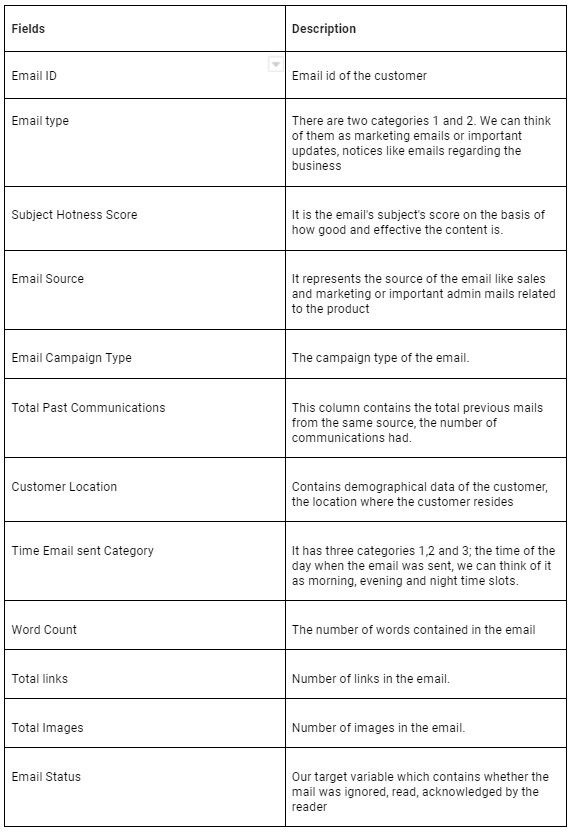

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns.tolist():
  print(f'number of Unique values for {col} is {df[col].nunique()}')

number of Unique values for Email_ID is 48291
number of Unique values for Email_Type is 2
number of Unique values for Subject_Hotness_Score is 51
number of Unique values for Email_Source_Type is 2
number of Unique values for Customer_Location is 7
number of Unique values for Email_Campaign_Type is 3
number of Unique values for Total_Past_Communications is 64
number of Unique values for Time_Email_sent_Category is 3
number of Unique values for Word_Count is 151
number of Unique values for Total_Links is 37
number of Unique values for Total_Images is 44
number of Unique values for Email_Status is 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
t_df=df.copy()
df['Email_Status'].value_counts()

Email_Status
0    38772
1     7841
2     1678
Name: count, dtype: int64

In [ ]:
# Transforming the numerical values in the columns into what that value actually means.
# - Email type and Email source type- 1 means Not important, 2 means important
t_df['Email_Type']=t_df['Email_Type'].apply( lambda x: 'Not important'if x == 1 else 'Important')

In [ ]:
# changing the time email sent category from 1,2,3 to mornining,evening and night time slots.
# 1 means morning, 2 means evening and 3 meaning night
t_df['Time_Email_sent_Category']=t_df['Time_Email_sent_Category'].apply(lambda x:'Morning' if x==1 else ('Evening' if x==2 else 'Night'))

In [ ]:
t_df['Email_Status']=t_df['Email_Status'].apply(lambda x: 'Ignored' if x==0 else('Read' if x==1 else 'Acknowledged'))

In [ ]:
t_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,Not important,2.2,2,E,2,33.0,Morning,440,8.0,0.0,Ignored
2,EMA00081000066290,Important,0.1,1,B,3,36.0,Evening,962,5.0,0.0,Read
3,EMA00081000076560,Not important,3.0,2,E,2,25.0,Evening,610,16.0,0.0,Ignored
4,EMA00081000109720,Not important,0.0,2,C,3,18.0,Evening,947,4.0,0.0,Ignored
6,EMA00081000160500,Not important,3.2,1,E,2,34.0,Night,116,4.0,0.0,Ignored
...,...,...,...,...,...,...,...,...,...,...,...,...
68346,EMA00089992519500,Not important,1.2,2,E,2,30.0,Night,565,14.0,3.0,Read
68348,EMA00089995974500,Important,0.4,1,F,2,22.0,Night,737,16.0,13.0,Ignored
68349,EMA00089998225300,Not important,1.3,1,C,2,40.0,Evening,653,31.0,16.0,Ignored
68351,EMA00089999168800,Not important,0.4,1,E,2,50.0,Morning,733,14.0,4.0,Ignored


### What all manipulations have you done and insights you found?

- i have changed the Email type and email source type to important and not important.
- i have changed the time email sent category to morning,evening and night
- i have changed the email status to ignored,read or acknowleged.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., Email status (Univariate)

([<matplotlib.patches.Wedge at 0x7ca78c2f7850>,
 [Text(-0.8957372792490217, 0.6384784464361819, 'Ignored'),
  Text(0.8208456841503488, -0.7322652270944908, 'Read'),
  Text(1.0934524152009126, -0.1198407931018945, 'Acknowledged')],
 [Text(-0.48858397049946634, 0.34826097078337187, '80.3%'),
  Text(0.4477340095365538, -0.39941739659699493, '16.2%'),
  Text(0.5964285901095887, -0.06536770532830609, '3.5%')])

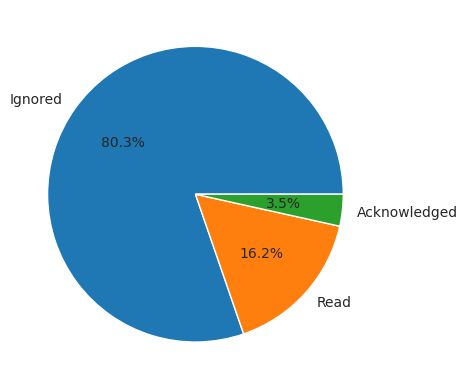

In [ ]:
# Chart - 1 visualization code
status_counts=t_df['Email_Status'].value_counts()
labels=status_counts.index
plt.pie(status_counts,labels=labels,autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

to understand the distribution of dependent variable

##### 2. What is/are the insight(s) found from the chart?

h1- no matter how many mail we sees, 80% of

only 20% of messages are viewed by user and only 3% is acknowleged by user.

we can not know whether the ignored emails are seen and then ignored or they not seen at all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To increase the marketing and revenue we need to maximize the no of people who read our email.

#### Chart - 2 Email type (Univariate)

([<matplotlib.patches.Wedge at 0x7ca78c362ec0>,
 [Text(-0.6865898214117196, 0.8594151599394922, 'Not important'),
  Text(0.6865898214117199, -0.859415159939492, 'Important')],
 [Text(-0.374503538951847, 0.4687719054215412, '71.5%'),
  Text(0.3745035389518471, -0.46877190542154107, '28.5%')])

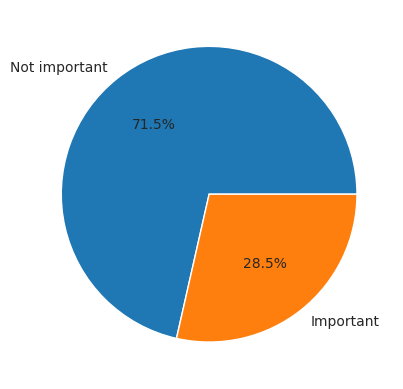

In [ ]:
# Chart - 2 visualization code
status_counts=t_df['Email_Type'].value_counts()
labels=status_counts.index

plt.pie(status_counts,labels=labels,autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

to find how many emails sent are important or not important?

##### 2. What is/are the insight(s) found from the chart?

only 28.5% of the emails sent are important

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

if we increase the number of important emails then we can also increase the no of read or acknowleged emails.

#### Chart - 3 Subject hotness score (Biavraite)

<Axes: xlabel='Email_Status', ylabel='Subject_Hotness_Score'>

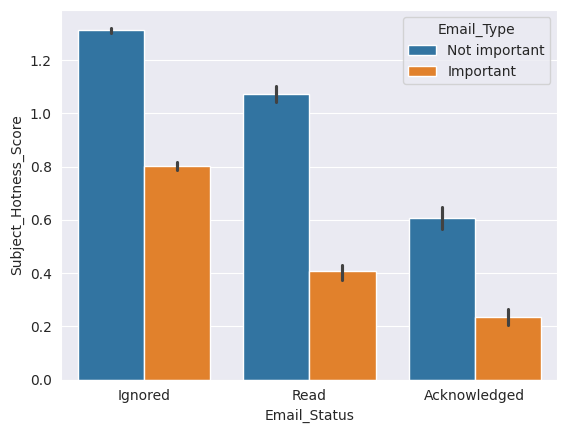

In [ ]:
# Chart - 3 visualization code
sns.barplot(data=t_df,x='Email_Status',y='Subject_Hotness_Score',hue='Email_Type')

##### 1. Why did you pick the specific chart?

to understand how good a the subject hotness score is of the emails which are ignored, read or opened.

##### 2. What is/are the insight(s) found from the chart?

- Ignored emails has the Highest number of subject hotness score
- most of the Read emails have similar subject hotness topic to ignored

##### 3. Will the gained insights help creating a positive business impact?
-Are there any insights that lead to negative growth? Justify with specific reason.

- we can  have positive buisness impact if we try to increase subject hotness topic of acknowleged emails. Why? to decrease the gap between read and acknowleged sibject score

#### Chart - 4 customer location (univariate)

<Axes: xlabel='Customer_Location', ylabel='Count'>

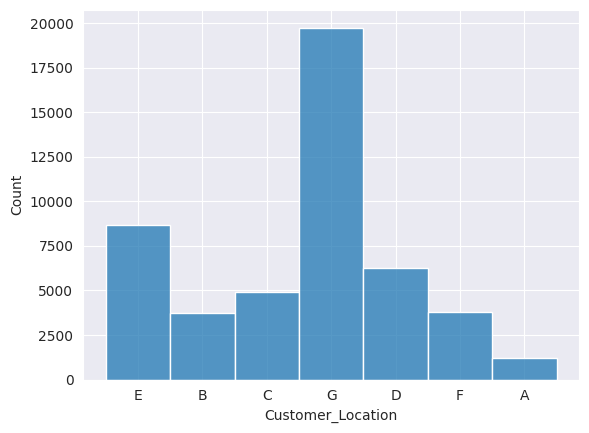

In [ ]:
# Chart-4 visualization code
sns.histplot(data=t_df,x='Customer_Location')

##### 1. Why did you pick the specific chart?

to understand the distribution of emails recieved for all locations

##### 2. What is/are the insight(s) found from the chart?

Location G has the highest no of email receviers. also, the second largest location has approx 50% of what location G has

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

to have positive buiness impact, we should focus on these loactions which has the highest email recievers.
- also, we should try to increase the count of email recievers on other location, which are intrested in our marketing campaign.

#### Chart - 5  customer location(bivariate with categorical)

In [ ]:
# Chart - 5 visualization code
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.sunburst(t_df, path=['Customer_Location', 'Email_Status','Email_Type'])
fig.show()

##### 1. Why did you pick the specific chart?

to understand the distriution of email type and the email status for different locations

##### 2. What is/are the insight(s) found from the chart?

In all the loaction, we found an intresting insight-

In Ignored emails-
  - more than 50% of these emails are not important

in reead emails-
- more than 50% of these emails are not important

it means for both important and not importaant emails the chance of them being ignored or read depends on the volume

more the no of emails of specific type, more

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we should be designing our emails such that user does not ignore the read emails.

it could be by reducing the volume of not important emails.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
t_df
# sns.barplot(data=t_df,x='Time_Email_sent_Category',y='Email_Status')
fig = px.sunburst(t_df, path=['Time_Email_sent_Category', 'Email_Status'])
fig.show()

##### 1. Why did you pick the specific chart?

to understand how much the time of sendimg the email matters for the user to ignore it, read it or acknowlege it.

##### 2. What is/are the insight(s) found from the chart?

most of the emails are sent in evening and equally sent in mornining and night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can assume here that the customers are mostly free during this time and can check their email during evening.

so we must target the evening slot for sending emails to increase the read/acknoleged proportion.

#### Chart - 7  Total past communications(Bivariate)

<Axes: xlabel='Email_Status', ylabel='Total_Past_Communications'>

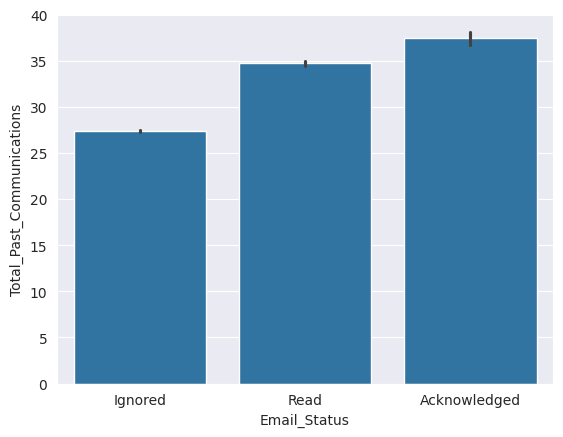

In [ ]:
# Chart - 7 visualization code
# fig = px.sunburst(df, path=['Total_Past_Communications', 'Email_Status'])
# fig.show()
sns.barplot(data=t_df,x='Email_Status',y='Total_Past_Communications')

##### 1. Why did you pick the specific chart?

to understand the relationship btw number of previous communications with user that has already happened with the status if the email.

##### 2. What is/are the insight(s) found from the chart?

- the email which are acknowleged have highest number of total past communications and it keeps on decreasing as we moves towards the read email and then to ignored email

this tells us that as the no of communication increases, more the chance of the email being read and acknowleged.
assuming this is beacuse of the more the communication, more the relationship builds and better the chances of mail being opened.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, to increase the number of recieved emails being read or acknowleged, we can increase the previous communication. we should note that the emails sent should relevant to users and important.

#### Chart - 8 Word count

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48291 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   48291 non-null  object 
 1   Email_Type                 48291 non-null  object 
 2   Subject_Hotness_Score      48291 non-null  float64
 3   Email_Source_Type          48291 non-null  int64  
 4   Customer_Location          48291 non-null  object 
 5   Email_Campaign_Type        48291 non-null  int64  
 6   Total_Past_Communications  48291 non-null  float64
 7   Time_Email_sent_Category   48291 non-null  object 
 8   Word_Count                 48291 non-null  int64  
 9   Total_Links                48291 non-null  float64
 10  Total_Images               48291 non-null  float64
 11  Email_Status               48291 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 4.8+ MB


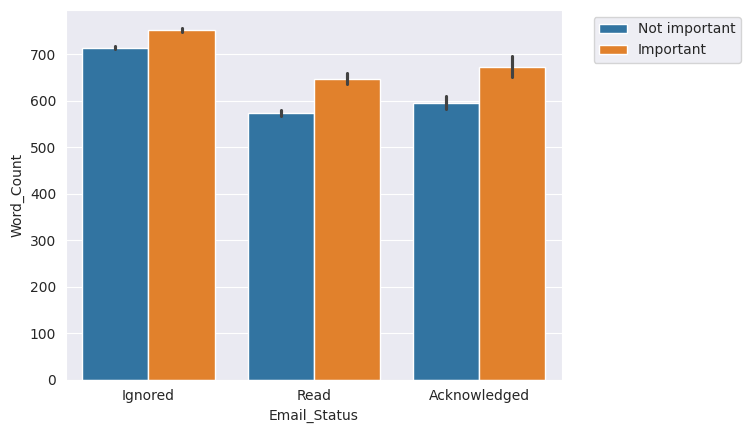

In [ ]:
# Chart - 8 visualization code
plot=sns.barplot(data=t_df,y='Word_Count',x='Email_Status',hue='Email_Type')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

##### 1. Why did you pick the specific chart?

to understand how the word count matters for different email status.

##### 2. What is/are the insight(s) found from the chart?

word count is highest in ignored mails and close second is acknowleged.

we can say the word count doesnt matter much for both important and unimportant mails if we want to predict whether the email will be ignored or read.


the safe word limit would be 500 -700

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can conclude that the contnet is more important than the number but the recommended word limit is 500-700 words

#### Chart - 9 (no of links + no of images) biavariate

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48291 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   48291 non-null  object 
 1   Email_Type                 48291 non-null  object 
 2   Subject_Hotness_Score      48291 non-null  float64
 3   Email_Source_Type          48291 non-null  int64  
 4   Customer_Location          48291 non-null  object 
 5   Email_Campaign_Type        48291 non-null  int64  
 6   Total_Past_Communications  48291 non-null  float64
 7   Time_Email_sent_Category   48291 non-null  object 
 8   Word_Count                 48291 non-null  int64  
 9   Total_Links                48291 non-null  float64
 10  Total_Images               48291 non-null  float64
 11  Email_Status               48291 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 4.8+ MB


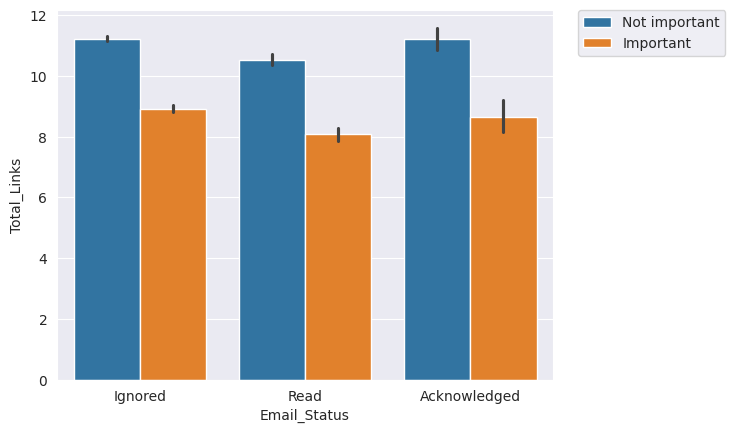

In [ ]:
# Chart - 9 visualization code
plot=sns.barplot(data=t_df,y='Total_Links',x='Email_Status',hue='Email_Type')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

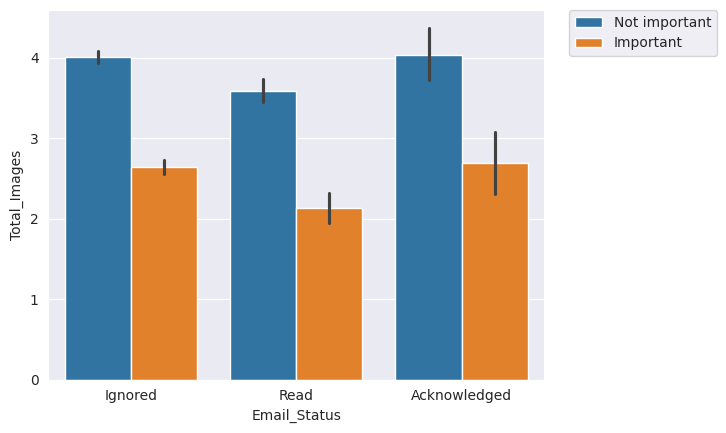

In [ ]:
# Chart - 9 visualization code
plot=sns.barplot(data=t_df,y='Total_Images',x='Email_Status',hue='Email_Type')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### 1. Why did you pick the specific chart?

to understand how many links  and images emails haves based on different email status and email type.

##### 2. What is/are the insight(s) found from the chart?

important emails have less no of links as compared to not important emails.
same is with the total number of images.

for all emails status and email types-
- no of links range from 8-11
- no of images range from 2-4

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the links serves the purpouse of refrence or call to action in a emails for user
images is used for visual learning or advertisment or companies logos.

links and images shoulde be used that it helpes in improving the customer experience.

#### Chart - 10

<class 'pandas.core.frame.DataFrame'>
Index: 48291 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   48291 non-null  object 
 1   Email_Type                 48291 non-null  object 
 2   Subject_Hotness_Score      48291 non-null  float64
 3   Email_Source_Type          48291 non-null  int64  
 4   Customer_Location          48291 non-null  object 
 5   Email_Campaign_Type        48291 non-null  int64  
 6   Total_Past_Communications  48291 non-null  float64
 7   Time_Email_sent_Category   48291 non-null  object 
 8   Word_Count                 48291 non-null  int64  
 9   Total_Links                48291 non-null  float64
 10  Total_Images               48291 non-null  float64
 11  Email_Status               48291 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 4.8+ MB


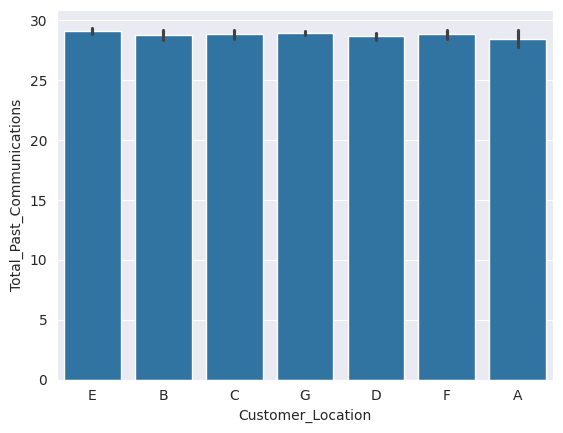

In [ ]:
# Chart - 10 visualization code
t_df.info()
# sns.barplot(data=t_df,x='Customer_Location',y='Email_Campaign_Type')
ax=sns.barplot(data=t_df,x='Customer_Location',y='Total_Past_Communications')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plot.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Correlation Heatmap

In [ ]:
t_df.head(20)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,Not important,2.2,2,E,2,33.0,Morning,440,8.0,0.0,Ignored
2,EMA00081000066290,Important,0.1,1,B,3,36.0,Evening,962,5.0,0.0,Read
3,EMA00081000076560,Not important,3.0,2,E,2,25.0,Evening,610,16.0,0.0,Ignored
4,EMA00081000109720,Not important,0.0,2,C,3,18.0,Evening,947,4.0,0.0,Ignored
6,EMA00081000160500,Not important,3.2,1,E,2,34.0,Night,116,4.0,0.0,Ignored
7,EMA00081000269630,Not important,0.7,2,G,2,21.0,Evening,1241,6.0,2.0,Ignored
9,EMA00081000367310,Important,0.5,1,G,2,40.0,Night,655,11.0,0.0,Ignored
10,EMA00081000428660,Important,0.2,1,G,3,27.0,Night,744,6.0,0.0,Ignored
11,EMA00081000583620,Not important,1.0,1,D,2,24.0,Evening,931,21.0,16.0,Ignored
12,EMA00081000591290,Important,0.1,1,C,3,42.0,Evening,550,6.0,0.0,Ignored


<Axes: >

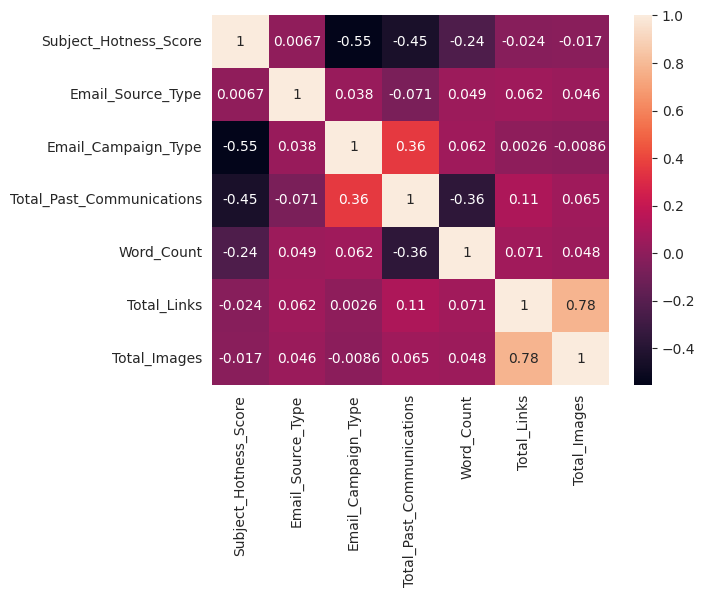

In [ ]:
# Correlation Heatmap visualization code
numerical_columns=t_df[t_df.describe().columns.tolist()]
corr_matrix=numerical_columns.corr()
# t_df.info()
# sns.heatmap(data=t_df.)
sns.heatmap(corr_matrix,annot=True)

##### 1. Why did you pick the specific chart?

to understand relation between all continous variable by finnding co relation matrix

##### 2. What is/are the insight(s) found from the chart?

- email campaign type and total past communication have strong inverse corleation with subject hotness score
- word count and total past communications also has strong negative co relation.
- total images and total links has positive corelation

#### Chart - 12 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(t_df,hue='Email_Status')

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. for customers who ignore our mails and mails are of important type has average past communications of at least 26.8.
2. for customers who ignore our mails which are not important, it has average subject hotness score of at most 1.3
3. for customers who are reading our emails have at least
average Subject_Hotness_Score of 0.495=0.5

In [ ]:
t_df.head(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,Not important,2.2,2,E,2,33.0,Morning,440,8.0,0.0,Ignored
2,EMA00081000066290,Important,0.1,1,B,3,36.0,Evening,962,5.0,0.0,Read
3,EMA00081000076560,Not important,3.0,2,E,2,25.0,Evening,610,16.0,0.0,Ignored
4,EMA00081000109720,Not important,0.0,2,C,3,18.0,Evening,947,4.0,0.0,Ignored
6,EMA00081000160500,Not important,3.2,1,E,2,34.0,Night,116,4.0,0.0,Ignored
7,EMA00081000269630,Not important,0.7,2,G,2,21.0,Evening,1241,6.0,2.0,Ignored
9,EMA00081000367310,Important,0.5,1,G,2,40.0,Night,655,11.0,0.0,Ignored
10,EMA00081000428660,Important,0.2,1,G,3,27.0,Night,744,6.0,0.0,Ignored
11,EMA00081000583620,Not important,1.0,1,D,2,24.0,Evening,931,21.0,16.0,Ignored
12,EMA00081000591290,Important,0.1,1,C,3,42.0,Evening,550,6.0,0.0,Ignored


In [ ]:
t_df[(t_df['Email_Status']=='Ignored')&(t_df['Email_Type']=='Not important')]['Subject_Hotness_Score'].mean()

1.310954371932376

In [ ]:
# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp


variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

H1- for Customers


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

for customers who ignore our mails and are of important type has average past communications of at least 26.8.


Ho-  N =26.8

Ha-  N < 26.8

type of test- left tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hyp1=t_df[(t_df['Email_Status']=='Ignored')&(t_df['Email_Type']=='Important')]

hypothesis_number= 26.8

sample_mean=hyp1['Total_Past_Communications'].mean()

size=len(hyp1)

std=variance(hyp1['Total_Past_Communications'])**0.5


In [ ]:
# getting z values

z=findz.mean(hypothesis_number,sample_mean,size,std)

# getting p value
p=p_value(z=z,tailed='l',t='false',hypothesis_number=hypothesis_number,df=hyp1,col='Total_Past_Communications')
# getting conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.801333489757792.


##### Which statistical test have you done to obtain P-Value?

I am doing a Z test for finding the z test staisc and p value to conclude whether to reject null hypothesis or not.

##### Why did you choose the specific statistical test?

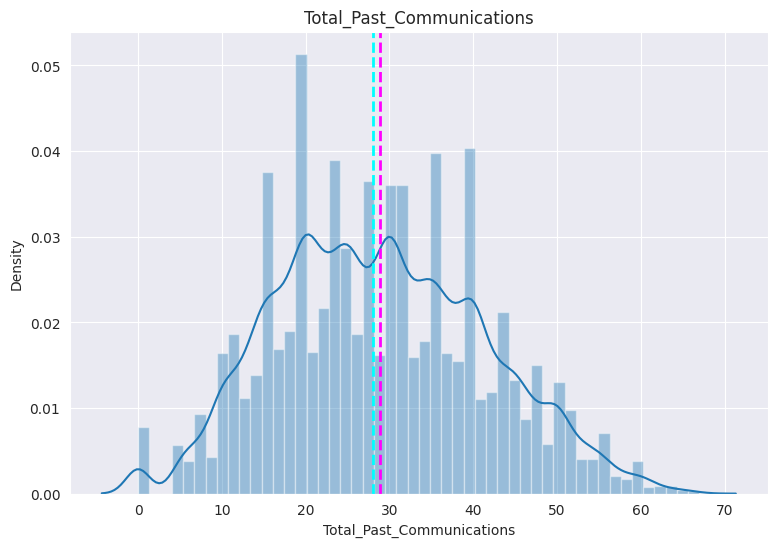

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (t_df['Total_Past_Communications'])
sns.distplot(t_df['Total_Past_Communications'])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Total_Past_Communications')
plt.show()

as the distribution is normal, we used the z test

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

for customers who ignore our mails which are not important, it has average subject hotness score of at most 1.3

Ho- N = 1.3

Ha- N > 1.3

type of test= right tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hyp2=t_df[(t_df['Email_Status']=='Ignored')&(t_df['Email_Type']=='Not important')]


# Getting the required parameter values for hypothesis testing
hypothesis_number = 1.3
sample_mean = hyp2['Subject_Hotness_Score'].mean()
size = len(hyp2)
std=(variance(hyp2["Subject_Hotness_Score"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hyp2,col="Subject_Hotness_Score")

# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.06928432004952695.


##### Which statistical test have you done to obtain P-Value?

we use t test for getting the p value

##### Why did you choose the specific statistical test?

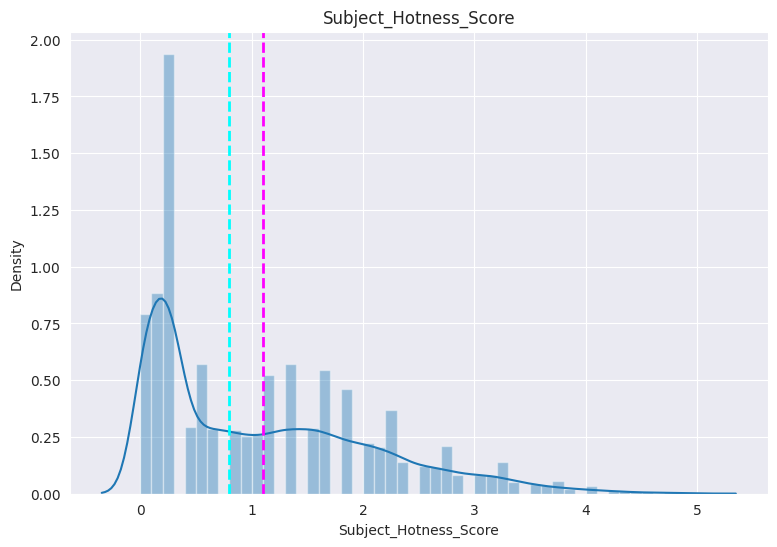

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (t_df['Subject_Hotness_Score'])
sns.distplot(t_df['Subject_Hotness_Score'])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Subject_Hotness_Score')
plt.show()

as the data is not normally distributed, and is skewed. we use t test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

for customers who are reading our emails have average Subject_Hotness_Score equal to 0.9

Ho- N = 0.9

Ha N != 0.9

type of test- two tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=t_df[(t_df['Email_Status']=='Read')]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 0.9
sample_mean = hypo_3['Subject_Hotness_Score'].mean()
size = len(hypo_3)
std=(variance(hypo_3["Subject_Hotness_Score"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="Subject_Hotness_Score")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9335206131323541.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

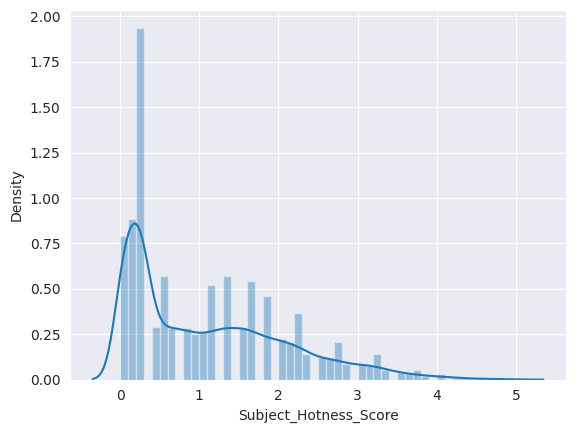

In [ ]:

ax=fig.gca()
feature= (t_df['Subject_Hotness_Score'])
sns.distplot(t_df['Subject_Hotness_Score'])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('Subject_Hotness_Score')
plt.show()

##### Why did you choose the specific statistical test?

as the distribution is not normal so we cant use z score as it assumes normal distribution. hence we do t test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

as there are no missing values, no imputatation

### 2. Handling Outliers

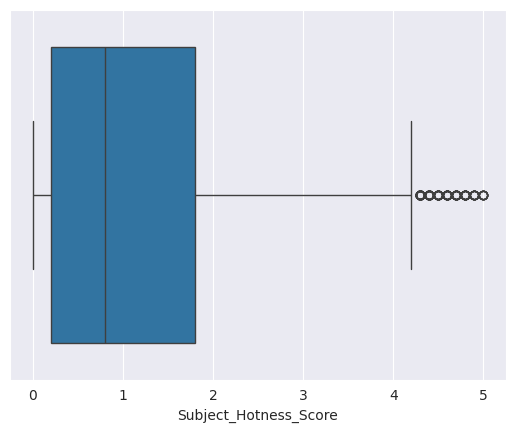

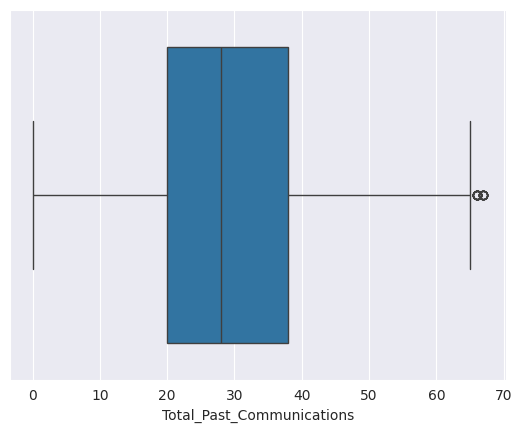

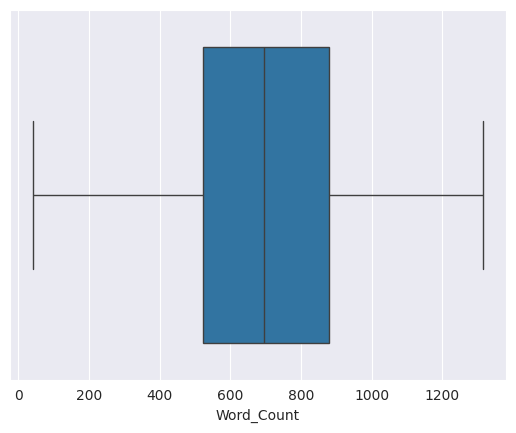

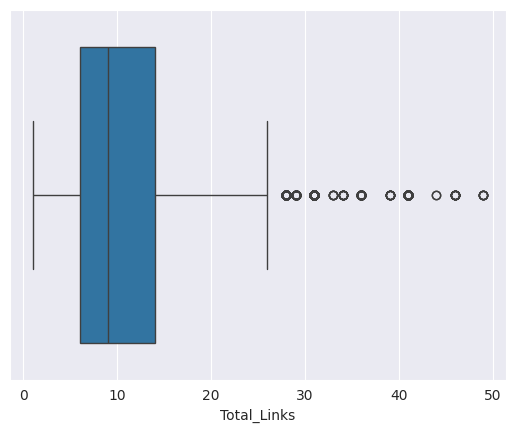

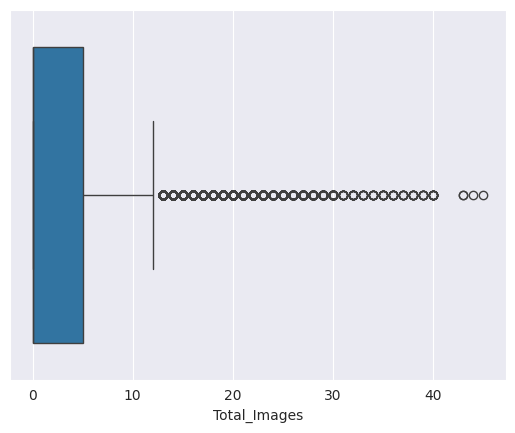

In [ ]:
# df
# sns.boxplot(data=df,x='Subject_Hotness_Score')
# numerical_columns = df.describe().columns.tolist()
numerical_columns=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for column in numerical_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

In [ ]:
# # Handling Outliers & Outlier treatments
# # To separate the symmetric distributed features and skew symmetric distributed features
# symmetric_feature=[]
# non_symmetric_feature=[]
# from scipy.stats import skew

# for i in numerical_columns:
#   if abs(skew(df[i])) < 1:
#     symmetric_feature.append(i)
#   else:
#     # df[i]=df[abs(skew)]

# # Getting Symmetric Distributed Features
# print("Symmetric Distributed Features : -",symmetric_feature)

# # Getting Skew Symmetric Distributed Features
# print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

as we want to remove highly skewed data, so we are considering skewness which is greater than 1.

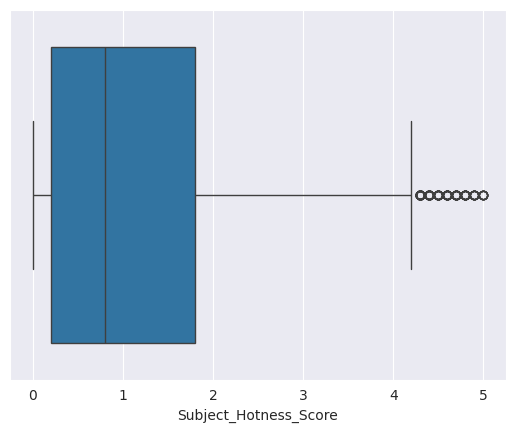

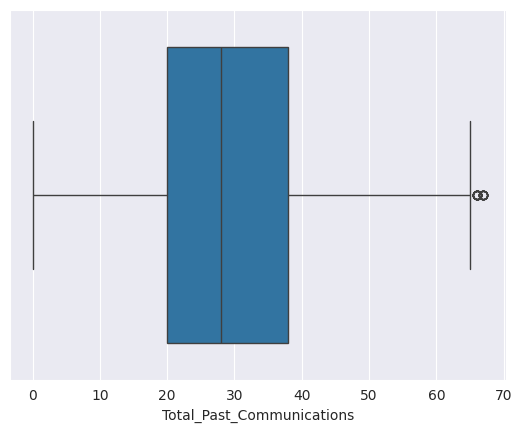

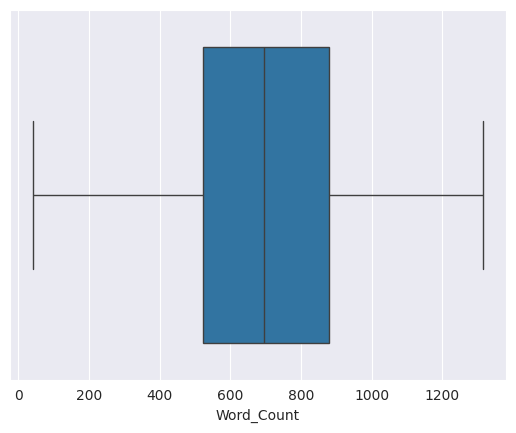

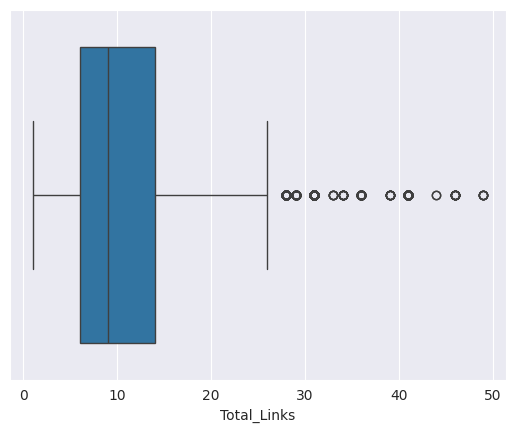

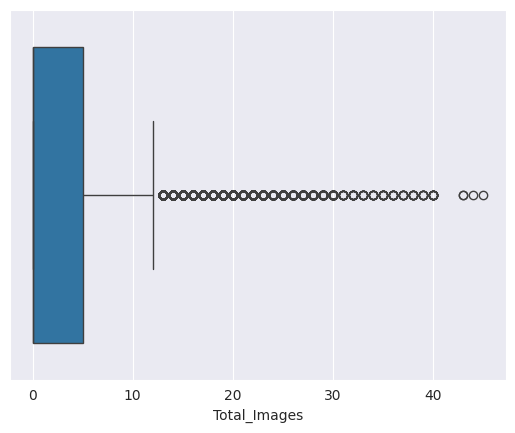

In [ ]:
numerical_columns=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for column in numerical_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Email_ID'] = le.fit_transform(df['Email_ID'])

In [ ]:
!pip install category_encoders
import category_encoders as ce

# Create the BinaryEncoder
binary_encoder = ce.BinaryEncoder()

# Fit and transform the 'Customer_Location' column
encoded = binary_encoder.fit_transform(df['Customer_Location'])

# Join the encoded DataFrame with the original DataFrame
df = df.join(encoded)
df=df.drop('Customer_Location',axis=1)
df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_0,Customer_Location_1,Customer_Location_2
0,0,1,2.2,2,2,33.0,1,440,8.0,0.0,0,0,0,1
2,1,2,0.1,1,3,36.0,2,962,5.0,0.0,1,0,1,0
3,2,1,3.0,2,2,25.0,2,610,16.0,0.0,0,0,0,1
4,3,1,0.0,2,3,18.0,2,947,4.0,0.0,0,0,1,1
6,4,1,3.2,1,2,34.0,3,116,4.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68346,48286,1,1.2,2,2,30.0,3,565,14.0,3.0,1,0,0,1
68348,48287,2,0.4,1,2,22.0,3,737,16.0,13.0,0,1,1,0
68349,48288,1,1.3,1,2,40.0,2,653,31.0,16.0,0,0,1,1
68351,48289,1,0.4,1,2,50.0,1,733,14.0,4.0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

firstly, i have done label encoding on email type as all emails are string can not be converted into numeric format.

i have done binary encoding for the column of customer location and droping the customer location column after joining.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# converting each column in data frame to a numerical columns so we can calculate VIF

#### 2. Feature Selection

In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status', 'Customer_Location_0', 'Customer_Location_1',
       'Customer_Location_2'],
      dtype='object')

In [ ]:
# Select your features wisely to avoid overfitting
# Manipulate Features to minimize feature correlation and create new features
# using corelation matrix and heatmap to visualize co linearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col=['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status', 'Customer_Location_0', 'Customer_Location_1',
       'Customer_Location_2']
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df[col].columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[col].values, i)
                          for i in range(len(df[col].columns))]

print(vif_data)

                      feature        VIF
0                  Email_Type   9.773552
1       Subject_Hotness_Score   2.512372
2           Email_Source_Type   9.418741
3         Email_Campaign_Type  30.857225
4   Total_Past_Communications   9.422714
5    Time_Email_sent_Category  10.177195
6                  Word_Count   8.942489
7                 Total_Links   9.707979
8                Total_Images   3.601745
9                Email_Status   1.338546
10        Customer_Location_0   4.392930
11        Customer_Location_1   1.641359
12        Customer_Location_2   2.472573


##### What all feature selection methods have you used  and why?

as there is VIF is very high for email type and emails campaign type. so using them to train model will make our model perform poor.

as email type an email source means the same in defination. then we can drop one of them.

hence, i will drop the email campaign type column.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

i have already transformed my data into numerical data types and applied log transformation for efficent training of my model.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

no, i dont think we need dimensionality reduction. as we dont have a very higgh cardinality.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df.drop(columns='Email_Status')
y=df['Email_Status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print('x_train shape',X_train.shape,'\ny_train shape',y_train.shape)

x_train shape (38632, 13) 
y_train shape (38632,)


##### What data splitting ratio have you used and why?

we are using train_test_split startegy with 80/20 split for train and test dataset.

### 9. Handling Imbalanced Dataset

In [ ]:
y_train.value_counts()

Email_Status
0    31027
1     6256
2     1349
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

from above code, we can se that the data distribution as follows-

0- 81%


1- 15%


2- 3%


so the data is not extremly imbalnced. hence, we will no resample the data.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape,y_res.shape)

(116316, 13) (116316,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)


so to make it imbalnced, we will use the SMOTE method (systematic minority over sampling techniques).

this method create the synthetic sample of minority instead of duplicating them to make the data more balanced.

## ***7. ML Model Implementation***

### ML Model - 1 (implementing logistic regression)

In [ ]:
# ML Model - 1 Implementation
clf=LogisticRegression(fit_intercept=True,max_iter=1000)
# Fit the Algorithm
clf.fit(X_res,y_res)

# Predict on the model


LogisticRegression(max_iter=1000)

In [ ]:
# Checking the coefficients
clf.coef_

array([[-4.03362425e-06,  9.28748642e-02,  1.82349291e-01,
         1.21426611e-01,  5.85718533e-02, -4.59314369e-02,
         1.37863616e-01,  2.56460361e-04,  6.78883779e-02,
        -5.98599000e-02,  1.05766539e-01,  8.69071731e-02,
         1.02152292e-01],
       [ 1.46004772e-06, -2.67892175e-02,  6.99594509e-02,
        -6.35295523e-03, -1.34487610e-02,  1.08020057e-02,
        -1.07436358e-02, -4.55401295e-04, -2.30854201e-04,
         1.17032155e-02, -2.66675204e-02, -2.82928790e-02,
        -3.14357230e-02],
       [ 2.57356984e-06, -6.60856467e-02, -2.52308742e-01,
        -1.15073656e-01, -4.51230923e-02,  3.51294312e-02,
        -1.27119980e-01,  1.98940934e-04, -6.76575238e-02,
         4.81566845e-02, -7.90990186e-02, -5.86142941e-02,
        -7.07165694e-02]])

In [ ]:
# Checking the intercept value
clf.intercept_

array([ 0.01351145,  0.01217471, -0.02568615])

In [ ]:
# # Predict on the model
# # Get the predicted probabilities
train_preds = clf.predict_proba(X_res)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_res)
test_class_preds = clf.predict(X_test)
print(train_class_preds)

[0 2 0 ... 2 2 2]


In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_res)
test_accuracy = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy)
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5030348361360432
The accuracy on test data is  0.58639610725748


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

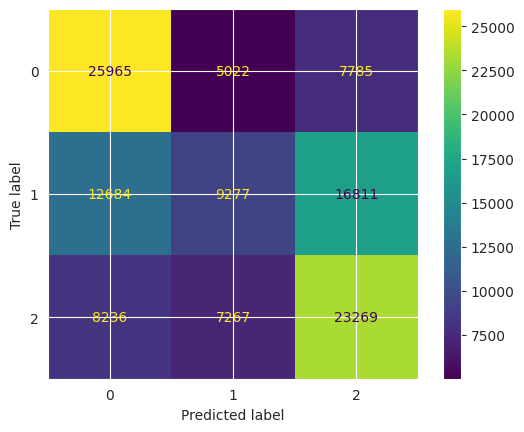

In [ ]:
# visualizing confusion matrix for train data

cm = confusion_matrix(y_res, train_class_preds)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


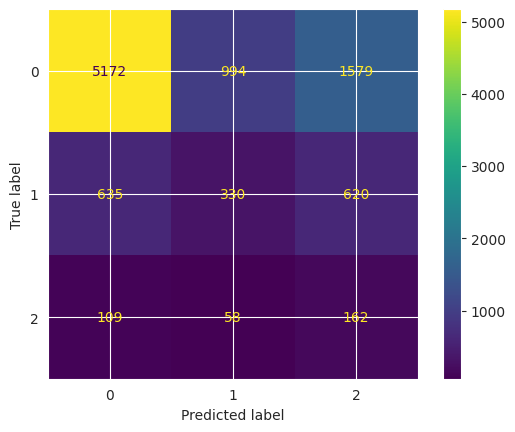

In [ ]:
# visualizing confusion matrix for test data

cm = confusion_matrix(y_test, test_class_preds)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
# evaluation metrics and ROC score for training data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(train_class_preds, y_res))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_res, train_preds,multi_class='ovr'))

METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       0.67      0.55      0.61     46885
           1       0.24      0.43      0.31     21566
           2       0.60      0.49      0.54     47865

    accuracy                           0.50    116316
   macro avg       0.50      0.49      0.48    116316
weighted avg       0.56      0.50      0.52    116316

 
roc_auc_score
0.68873749448078


In [ ]:
print('METRIC FOR TEST DATA\n')
print(metrics.classification_report(train_class_preds, y_res))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds,multi_class='ovr'))

METRIC FOR TEST DATA

              precision    recall  f1-score   support

           0       0.67      0.55      0.61     46885
           1       0.24      0.43      0.31     21566
           2       0.60      0.49      0.54     47865

    accuracy                           0.50    116316
   macro avg       0.50      0.49      0.48    116316
weighted avg       0.56      0.50      0.52    116316

 
roc_auc_score
0.6685332593387558


as the evaluation metrics above are not satisfactory, we will try hyper parameter tuning and cross validation to improve the genralization of the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
import scipy
from sklearn.model_selection import RandomizedSearchCV
model=LogisticRegression(max_iter=10000)

grid={'solver':['lbfgs'],'penalty':['l2'],'C':[1000,100, 10, 1.0, 0.1, 0.01,0.001]}
# chossing cross validation technique

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0,verbose=2)
# Fit the Algorithm
grid_result=grid_search.fit(X_train,y_train)

# finding best parameters
print(f'best score is {grid_result.best_score_} for these parameters{grid_result.best_params_}')


Fitting 5 folds for each of 7 candidates, totalling 35 fits
best score is 0.8027541758710669 for these parameters{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict on the test and train data for

# predicting class for each row
train_class_pred=grid_result.predict(X_train)
test_class_pred=grid_result.predict(X_test)

# predicting probailities of each class
train_class_prob=grid_result.predict_proba(X_train)
test_class_prob=grid_result.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

i used random search hyper parameter optimization technique here beause of the number of hyper parameters to  optimize is high and possible value is small

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no, we havent seen any improvement.

the improvement is

### ML Model - 2 (Random forest classifier)

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_res,y_res)


RandomForestClassifier()

In [ ]:
print(rf_model.feature_importances_)

[0.14998344 0.02634734 0.14114751 0.02981875 0.03115731 0.16403482
 0.0316737  0.13805248 0.12128514 0.08699759 0.02931246 0.02389843
 0.02629102]


In [ ]:
# getting the predicted class for training and test data
train_class_pred=rf_model.predict(X_res)
test_class_pred=rf_model.predict(X_test)

In [ ]:
train_class_prob=rf_model.predict_proba(X_res)

test_class_prob=rf_model.predict_proba(X_test)

In [ ]:
train_accuracy=accuracy_score(y_res,train_class_pred)
test_accuracy=accuracy_score(y_test,test_class_pred)

print(f'Train accuracy is {train_accuracy}\nTest accuracy is {test_accuracy}')


Train accuracy is 1.0
Test accuracy is 1.0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

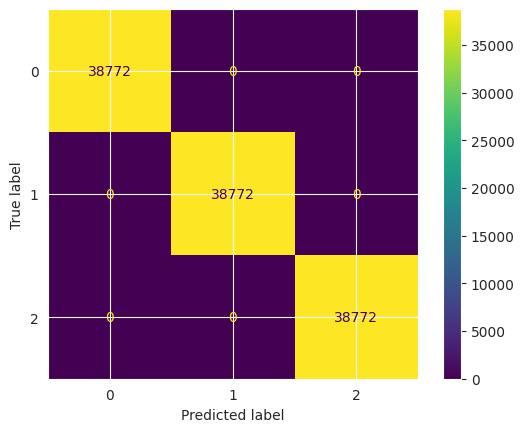

In [ ]:
# visualizing confusion matrix for training data
cm=confusion_matrix(y_res,train_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

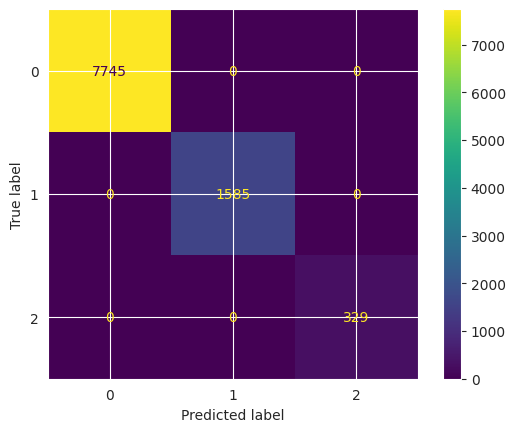

In [ ]:
# visualizing confusion matrix for test data
cm=confusion_matrix(y_test,test_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# evaluation metrics and ROC score for training data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(train_class_pred, y_res))
print(" ")


print("roc_auc_score")
print(metrics.roc_auc_score(y_res, train_class_prob,multi_class='ovr'))


METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38772
           1       1.00      1.00      1.00     38772
           2       1.00      1.00      1.00     38772

    accuracy                           1.00    116316
   macro avg       1.00      1.00      1.00    116316
weighted avg       1.00      1.00      1.00    116316

 
roc_auc_score
1.0


In [ ]:
# evaluation metrics and ROC score for testing data
print('METRIC FOR Test DATA\n')
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

# test_class_pred = classifier.predict_proba(X_test)

print("roc_auc_score")
print(metrics.roc_auc_score(y_test,test_class_prob,multi_class='ovr'))

METRIC FOR Test DATA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7745
           1       1.00      1.00      1.00      1585
           2       1.00      1.00      1.00       329

    accuracy                           1.00      9659
   macro avg       1.00      1.00      1.00      9659
weighted avg       1.00      1.00      1.00      9659

 
roc_auc_score
1.0


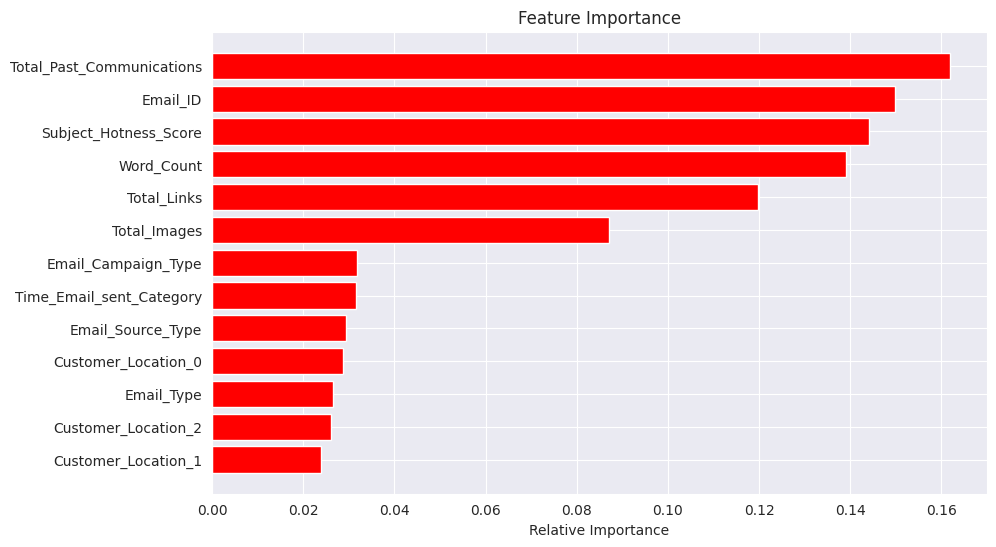

In [ ]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Sort indices based on importance
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()


as the above report indicates the overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# number of trees
n_estimators=[50,80,100]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# maximum depth of trees
max_depth=[4,6,8]

# minimum number of smaples required to split a node
min_samples_split=[50,100,150]

# minimum no samples required at each leaf node
min_samples_leaf=[40,50]

param_dict={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}


# Fit the Algorithm
rf_model=RandomForestClassifier()

rf_grid=GridSearchCV(estimator=rf_model,param_grid=param_dict,cv=5,verbose=2,scoring='accuracy')
rf_grid.fit(X_res,y_res)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   4.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [ ]:

# Predict on the model

train_class_pred=rf_grid.predict(X_res)
test_class_pred=rf_grid.predict(X_test)

train_class_prob=rf_grid.predict_proba(X_res)
test_class_prob=rf_grid.predict_proba(X_test)
print(f'Best score is {rf_grid.best_score_,rf_grid.best_params_}')

Best score is (0.5078082078879029, {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 50})


##### Which hyperparameter optimization technique have you used and why?

i have used grid search hyper parameter optimization.

Why?
beacuse we have small set of hyper parameter that we want to optimize.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

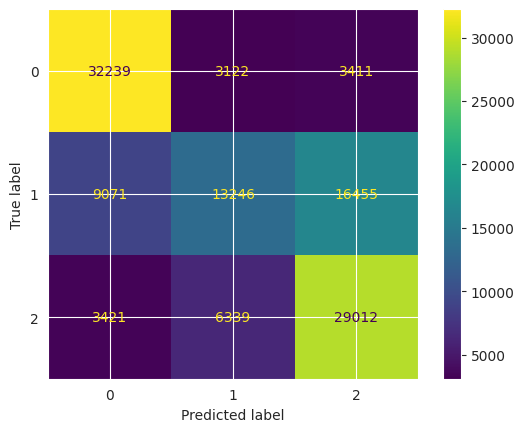

In [ ]:
# visualizing confusion matrix for train data
cm=confusion_matrix(y_res,train_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

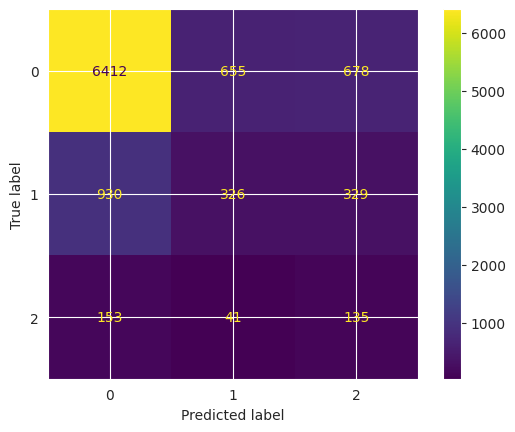

In [ ]:
# visualizing confusion matrix for test data
cm=confusion_matrix(y_test,test_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# evaluation metrics and ROC score for training data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(train_class_pred, y_res))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_res, train_class_prob,multi_class='ovr'))

METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     44731
           1       0.34      0.58      0.43     22707
           2       0.75      0.59      0.66     48878

    accuracy                           0.64    116316
   macro avg       0.64      0.63      0.62    116316
weighted avg       0.70      0.64      0.66    116316

 
roc_auc_score
0.8221199236622603


In [ ]:
# evaluation metrics and ROC score for testing data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

# test_class_pred = classifier.predict_proba(X_test)

print("roc_auc_score")
print(metrics.roc_auc_score(y_test,test_class_prob,multi_class='ovr'))

METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7495
           1       0.21      0.32      0.25      1022
           2       0.41      0.12      0.18      1142

    accuracy                           0.71      9659
   macro avg       0.48      0.43      0.43      9659
weighted avg       0.71      0.71      0.70      9659

 
roc_auc_score
0.7403753274579771


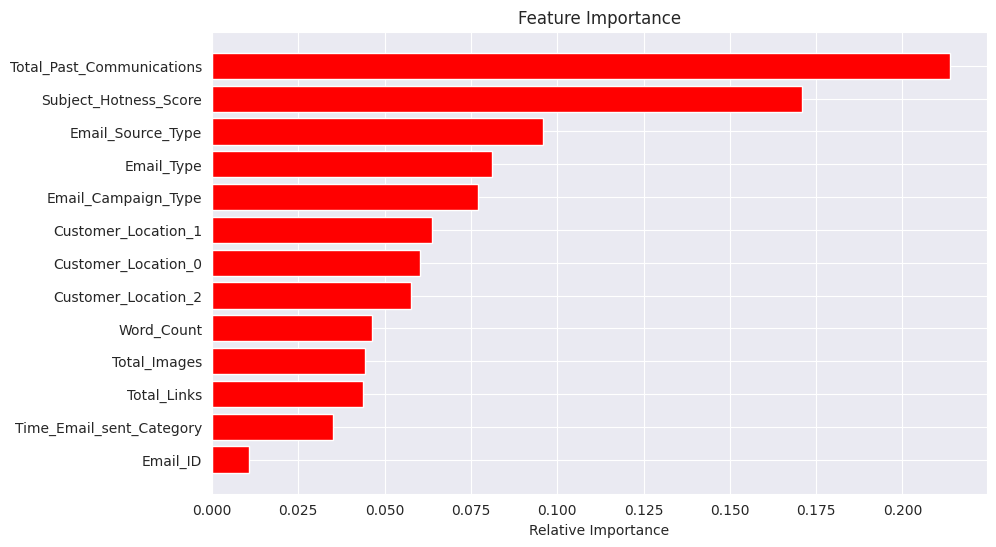

In [ ]:
# Get feature importances from the model
best_model=rf_grid.best_estimator_
importances = best_model.feature_importances_

# Sort indices based on importance
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **High Precision for Class 0 (Email Ignored)**:

The model is very accurate when it predicts that an email will be ignored. This could help in identifying which customers are less likely to engage with the emails, allowing you to tailor your strategy to improve engagement with these customers.


- **High Recall for Class 1 (Email Read)**:

The model is good at identifying the emails that will be read. This means that the model can effectively predict customer engagement. This insight can be used to target customers who are more likely to read the emails, thus optimizing the email campaign’s reach.


- **Class 2 (Email Acknowledged) Not Predicted**:

The model is not predicting any instance of emails being acknowledged. This is a significant issue as acknowledging an email might be a strong indicator of a customer’s interest or a potential conversion. You might need to look into the class distribution in your data. If class 2 is underrepresented, you might need to collect more data for this class or use techniques like SMOTE for balancing your data.


- **Low Precision for Class 1 (Email Read)**:

The model’s precision for class 1 is low, which means there are many false positives for this class. In other words, the model often predicts an email will be read when it is actually ignored or just acknowledged. This could lead to overestimating the engagement level of the email campaign.


- **Good Overall Accuracy and ROC AUC Score**:

The model’s accuracy and ROC AUC score are fairly high, which means it is correctly classifying instances most of the time and has good discriminative power between classes. However, the business impact of these metrics would depend on the specific cost-benefit trade-offs of your email campaign.

the top 5 most important features are -
- total past communications
- email campaign type
- word count
- subject hotness score
- total links

### ML Model - 3

In [ ]:
from xgboost import XGBClassifier
# ML Model - 3 Implementation
xg_model=XGBClassifier()
# Fit the Algorithm
xg_model.fit(X_res,y_res)
# Predict on the model
train_class_pred = xg_model.predict(X_res)
test_class_pred = xg_model.predict(X_test)

# predicting each class probabilities
train_class_prob = xg_model.predict_proba(X_res)
test_class_prob = xg_model.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

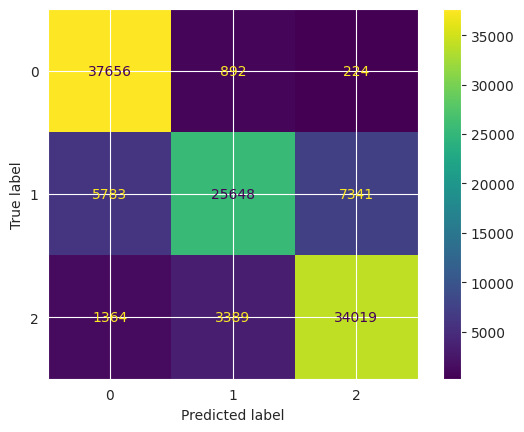

In [ ]:
# visualizing confusion matrix for training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_res,train_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

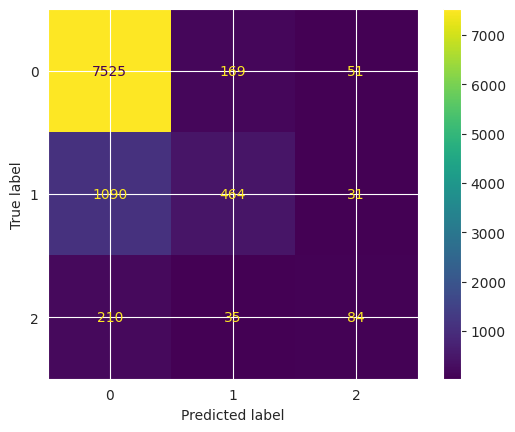

In [ ]:
# visualizing confusion matrix for test data
cm=confusion_matrix(y_test,test_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# evaluation metrics and ROC score for training data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(train_class_pred, y_res))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_res, train_class_prob,multi_class='ovr'))


METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     44803
           1       0.66      0.86      0.75     29929
           2       0.88      0.82      0.85     41584

    accuracy                           0.84    116316
   macro avg       0.84      0.84      0.83    116316
weighted avg       0.86      0.84      0.84    116316

 
roc_auc_score
0.946963042563319


In [ ]:
# evaluation metrics and ROC score for testing data
print('METRIC FOR Test DATA\n')
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

# test_class_pred = classifier.predict_proba(X_test)

print("roc_auc_score")
print(metrics.roc_auc_score(y_test,test_class_prob,multi_class='ovr'))


METRIC FOR Test DATA

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8825
           1       0.29      0.69      0.41       668
           2       0.26      0.51      0.34       166

    accuracy                           0.84      9659
   macro avg       0.51      0.68      0.55      9659
weighted avg       0.91      0.84      0.86      9659

 
roc_auc_score
0.86578974215272


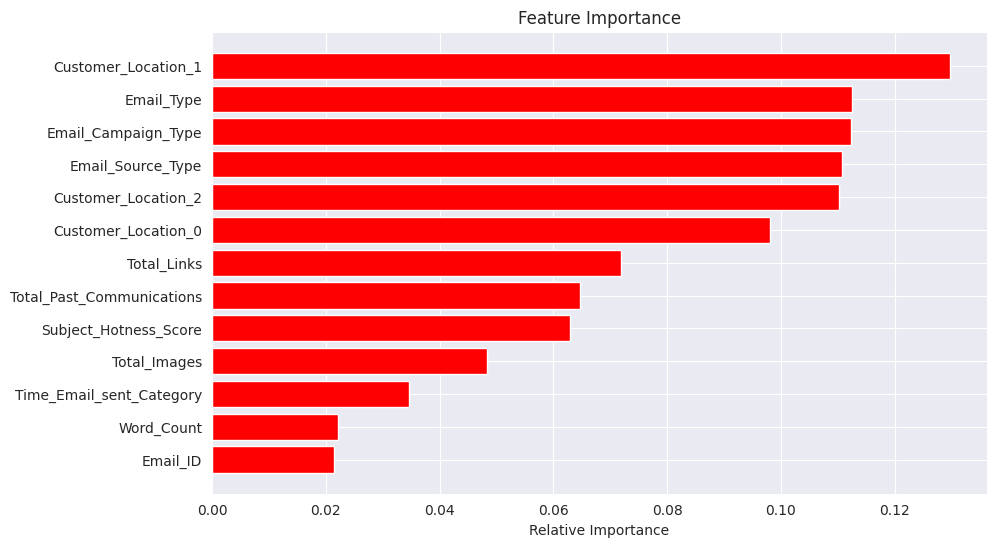

In [ ]:
# Get feature importances from the model
importances = xg_model.feature_importances_

# Sort indices based on importance
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [X_res.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()


Training Data: The model performs very well on the training data, with high precision, recall, and F1-score for all classes. The ROC AUC score, a measure of the model’s ability to distinguish between classes, is close to 1, indicating excellent performance.


Test Data: The model’s performance on the test data is lower than on the training data. While the precision for class 0 (email ignored) remains high, the recall is lower, suggesting that the model is not capturing all instances of class 0. For class 1 (email read), the recall is high but the precision is low, indicating that the model is correctly identifying emails that get read, but is also incorrectly classifying other emails as being read. The model is not predicting class 2 (email acknowledged) at all. The ROC AUC score for the test data is lower than for the training data, but still fairly good.


This discrepancy between training and test performance could be a sign of overfitting, where the model learns the training data too well and performs poorly on unseen data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_res,y_res)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)
# Fit the Algorithm

train_class_prob=xg_grid1.predict_proba(X_train)
test_class_prob=xg_grid1.predict_proba(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.0s
[CV] END max_depth=4, min_sam

In [ ]:

# Predict on the model

print(f'Best score is {xg_grid1.best_score_,xg_grid1.best_params_}')

Best score is (nan, {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50})


In [ ]:
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_res)
test_class_preds = xg_grid1.predict(X_test)
# Fit the Algorithm

train_class_prob=xg_grid1.predict_proba(X_res)
test_class_prob=xg_grid1.predict_proba(X_test)

##### Which hyperparameter optimization technique have you used and why?

we are using grid search here for using the hyperparameter grid to try all the possible combination of parameter and get the best scoring parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

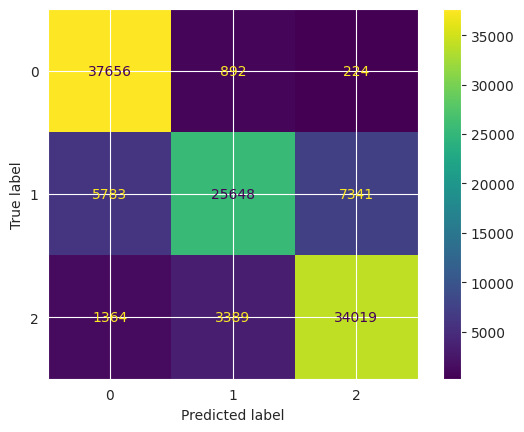

In [ ]:
# visualizing confusion matrix for training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_res,train_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

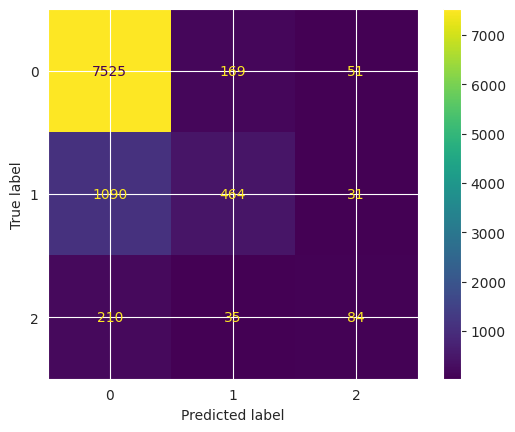

In [ ]:
# visualizing confusion matrix for test data
cm=confusion_matrix(y_test,test_class_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# evaluation metrics and ROC score for training data
print('METRIC FOR TRAIN DATA\n')
print(metrics.classification_report(train_class_pred, y_res))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_res, train_class_prob,multi_class='ovr'))


METRIC FOR TRAIN DATA

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     44803
           1       0.66      0.86      0.75     29929
           2       0.88      0.82      0.85     41584

    accuracy                           0.84    116316
   macro avg       0.84      0.84      0.83    116316
weighted avg       0.86      0.84      0.84    116316

 
roc_auc_score
0.8714169235133085


In [ ]:
# evaluation metrics and ROC score for testing data
print('METRIC FOR Test DATA\n')
print(metrics.classification_report(test_class_pred, y_test))
print(" ")

# test_class_pred = classifier.predict_proba(X_test)

print("roc_auc_score")
print(metrics.roc_auc_score(y_test,test_class_prob,multi_class='ovr'))


METRIC FOR Test DATA

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8825
           1       0.29      0.69      0.41       668
           2       0.26      0.51      0.34       166

    accuracy                           0.84      9659
   macro avg       0.51      0.68      0.55      9659
weighted avg       0.91      0.84      0.86      9659

 
roc_auc_score
0.7645165473657506


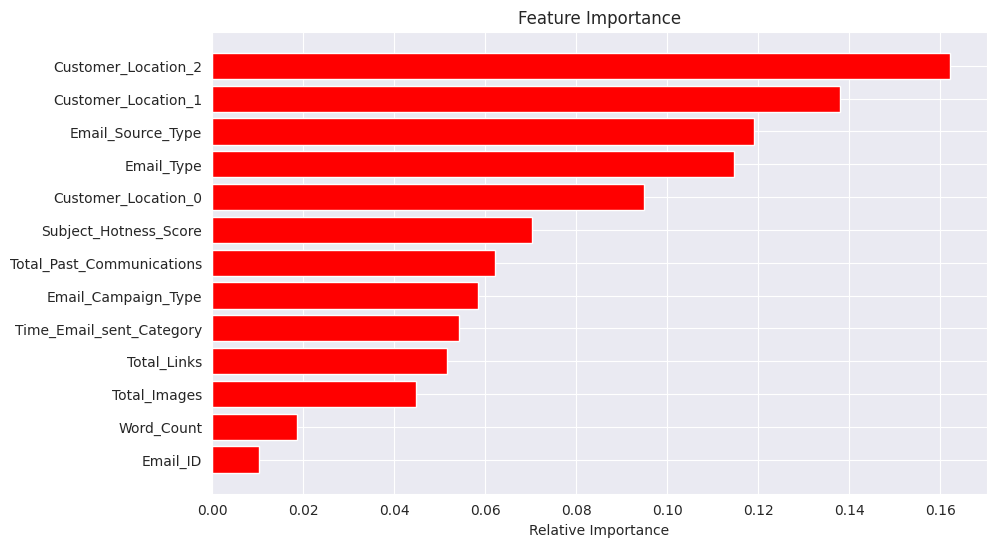

In [ ]:
# Get feature importances from the model
best_model=xg_grid1.best_estimator_
# importances = best_model.feature_importances_
importances = best_model.feature_importances_
# Sort indices based on importance
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

i would consider the precison,recall and ROC score as my evaluationmetrics.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Sure, let's analyze the performance of each algorithm using the metrics you've provided and discuss their potential business impact.

1. **XG Boost**
   - Precision: 0.97 (class 0), 0.66 (class 1), 0.88 (class 2)
   - Recall: 0.84 (class 0), 0.86 (class 1), 0.82 (class 2)
   - F1-Score: 0.90 (class 0), 0.75 (class 1), 0.85 (class 2)
   - ROC-AUC Score: 0.8714

2. **Logistic Regression**
   - Precision: 0.65 (class 0), 0.26 (class 1), 0.56 (class 2)
   - Recall: 0.53 (class 0), 0.43 (class 1), 0.48 (class 2)
   - F1-Score: 0.59 (class 0), 0.32 (class 1), 0.52 (class 2)
   - ROC-AUC Score: 0.6806

3. **Random Forest**
   - Precision: 0.83 (class 0), 0.35 (class 1), 0.75 (class 2)
   - Recall: 0.72 (class 0), 0.58 (class 1), 0.60 (class 2)
   - F1-Score: 0.77 (class 0), 0.44 (class 1), 0.67 (class 2)
   - ROC-AUC Score: 0.8217

From the results, it seems like the XG Boost model has the highest ROC-AUC score, indicating it might be the best model at distinguishing between the classes. However, the choice of the best model and metric would ultimately depend on the specific business context and the costs associated with False Positives and False Negatives.

If the cost of False Positives is high (i.e., you want to be very sure about the users to whom the emails are sent), then precision is important. In this case, XG Boost performs the best.

If it's very important not to miss out on potential users who would acknowledge the email (i.e., the cost of False Negatives is high), then recall becomes important. Here, XG Boost also performs the best.

If you want to balance both False Positives and False Negatives, then the F1-Score is the metric to consider. Again, XG Boost has the highest F1-Score.

Therefore, considering all these factors, XG Boost seems to have the most positive business impact.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File



### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

we have trained three models based on this and finally got the best results from XG boost.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***